In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import warnings
from sklearn.metrics import silhouette_score
plt.rcParams["figure.figsize"] = (20, 10)
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score



In [2]:
df = pd.read_parquet("C:\\Users\\Tobi\\Desktop\\New folder\\git\\Energy_Load_Profile_Classification\\Energy_Load_Profile_Classification\\main2.parquet")


In [3]:

def fillna_value():
    z = df
    Mean_Load = df.Mean_Load.mean()
    Max_Load = df.Max_Load.mean()
    Min_Load = df.Min_Load.mean()
    
    df['Mean_Load'].fillna(value=Mean_Load, inplace=True)
    df['Max_Load'].fillna(value=Max_Load, inplace=True)
    df['Min_Load'].fillna(value=Min_Load, inplace=True)
    
    return df

df = fillna_value()

In [4]:
main = df.copy()
main

,Time,week_date,Max_Load,Min_Load,Mean_Load,hour_of_the_week,WeekDay
0,2022-09-17 12:00:00,2022-09-11 (week 37),46.666,29.376,37.835000,133,Saturday
1,2022-09-17 13:00:00,2022-09-11 (week 37),51.045,31.066,43.259552,134,Saturday
2,2022-09-17 14:00:00,2022-09-11 (week 37),45.432,35.635,40.673883,135,Saturday
3,2022-09-17 15:00:00,2022-09-11 (week 37),47.489,36.948,43.198733,136,Saturday
4,2022-09-17 16:00:00,2022-09-11 (week 37),59.146,36.043,46.881117,137,Saturday
...,...,...,...,...,...,...,...
3271,2023-01-31 19:00:00,2023-01-29 (week 5),87.146,72.626,79.960733,44,Tuesday
3272,2023-01-31 20:00:00,2023-01-29 (week 5),82.882,70.813,77.210667,45,Tuesday
3273,2023-01-31 21:00:00,2023-01-29 (week 5),76.380,57.502,66.348317,46,Tuesday
3274,2023-01-31 22:00:00,2023-01-29 (week 5),62.340,52.269,57.426000,47,Tuesday


In [5]:
df = df[['Time','Mean_Load','hour_of_the_week']]
df
# main = df[['Mean_Load','hour_of_the_week']]

,Time,Mean_Load,hour_of_the_week
0,2022-09-17 12:00:00,37.835000,133
1,2022-09-17 13:00:00,43.259552,134
2,2022-09-17 14:00:00,40.673883,135
3,2022-09-17 15:00:00,43.198733,136
4,2022-09-17 16:00:00,46.881117,137
...,...,...,...
3271,2023-01-31 19:00:00,79.960733,44
3272,2023-01-31 20:00:00,77.210667,45
3273,2023-01-31 21:00:00,66.348317,46
3274,2023-01-31 22:00:00,57.426000,47


In [6]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

In [7]:
df

,Mean_Load,hour_of_the_week
Time,,
2022-09-17 12:00:00,37.835000,133
2022-09-17 13:00:00,43.259552,134
2022-09-17 14:00:00,40.673883,135
2022-09-17 15:00:00,43.198733,136
2022-09-17 16:00:00,46.881117,137
...,...,...
2023-01-31 19:00:00,79.960733,44
2023-01-31 20:00:00,77.210667,45
2023-01-31 21:00:00,66.348317,46


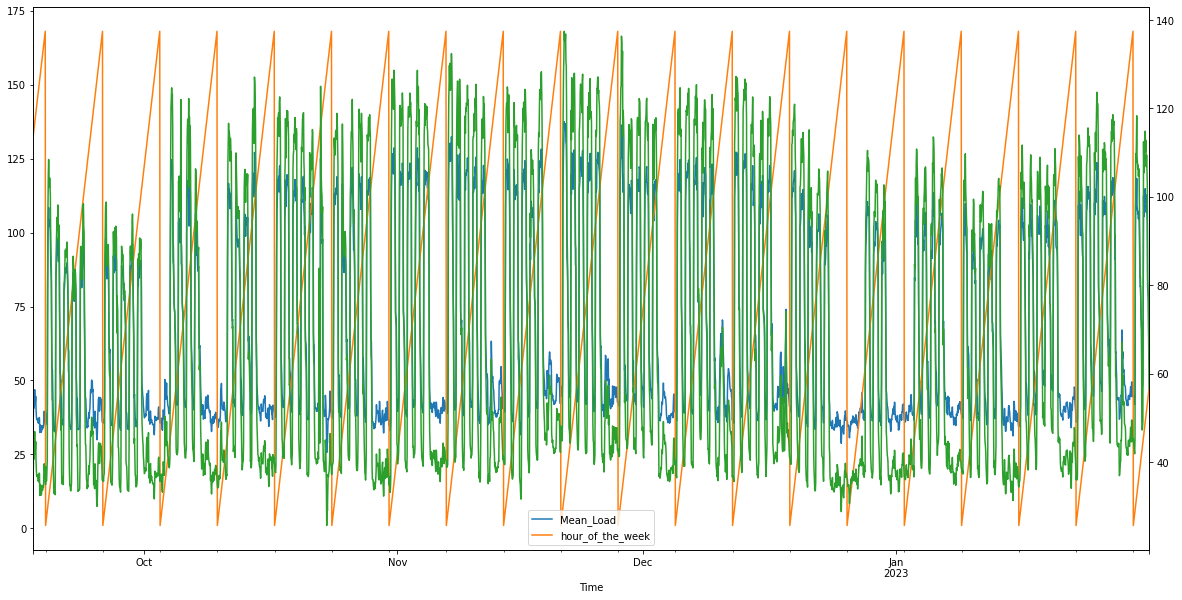

In [8]:
# plt.figure(figsize=(100,20))

df.plot()
df.Mean_Load.plot(secondary_y=True, label="open")

plt.show()

In [9]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

cf.go_offline()

In [10]:
# df.iplot(kind='line', x='Time',y='Mean_Load',title= 'Distribution by hours')

In [11]:
series = df.to_numpy()

In [12]:
series

array([[ 37.835     , 133.        ],
       [ 43.25955172, 134.        ],
       [ 40.67388333, 135.        ],
       ...,
       [ 66.34831667,  46.        ],
       [ 57.426     ,  47.        ],
       [ 56.462625  ,  48.        ]])

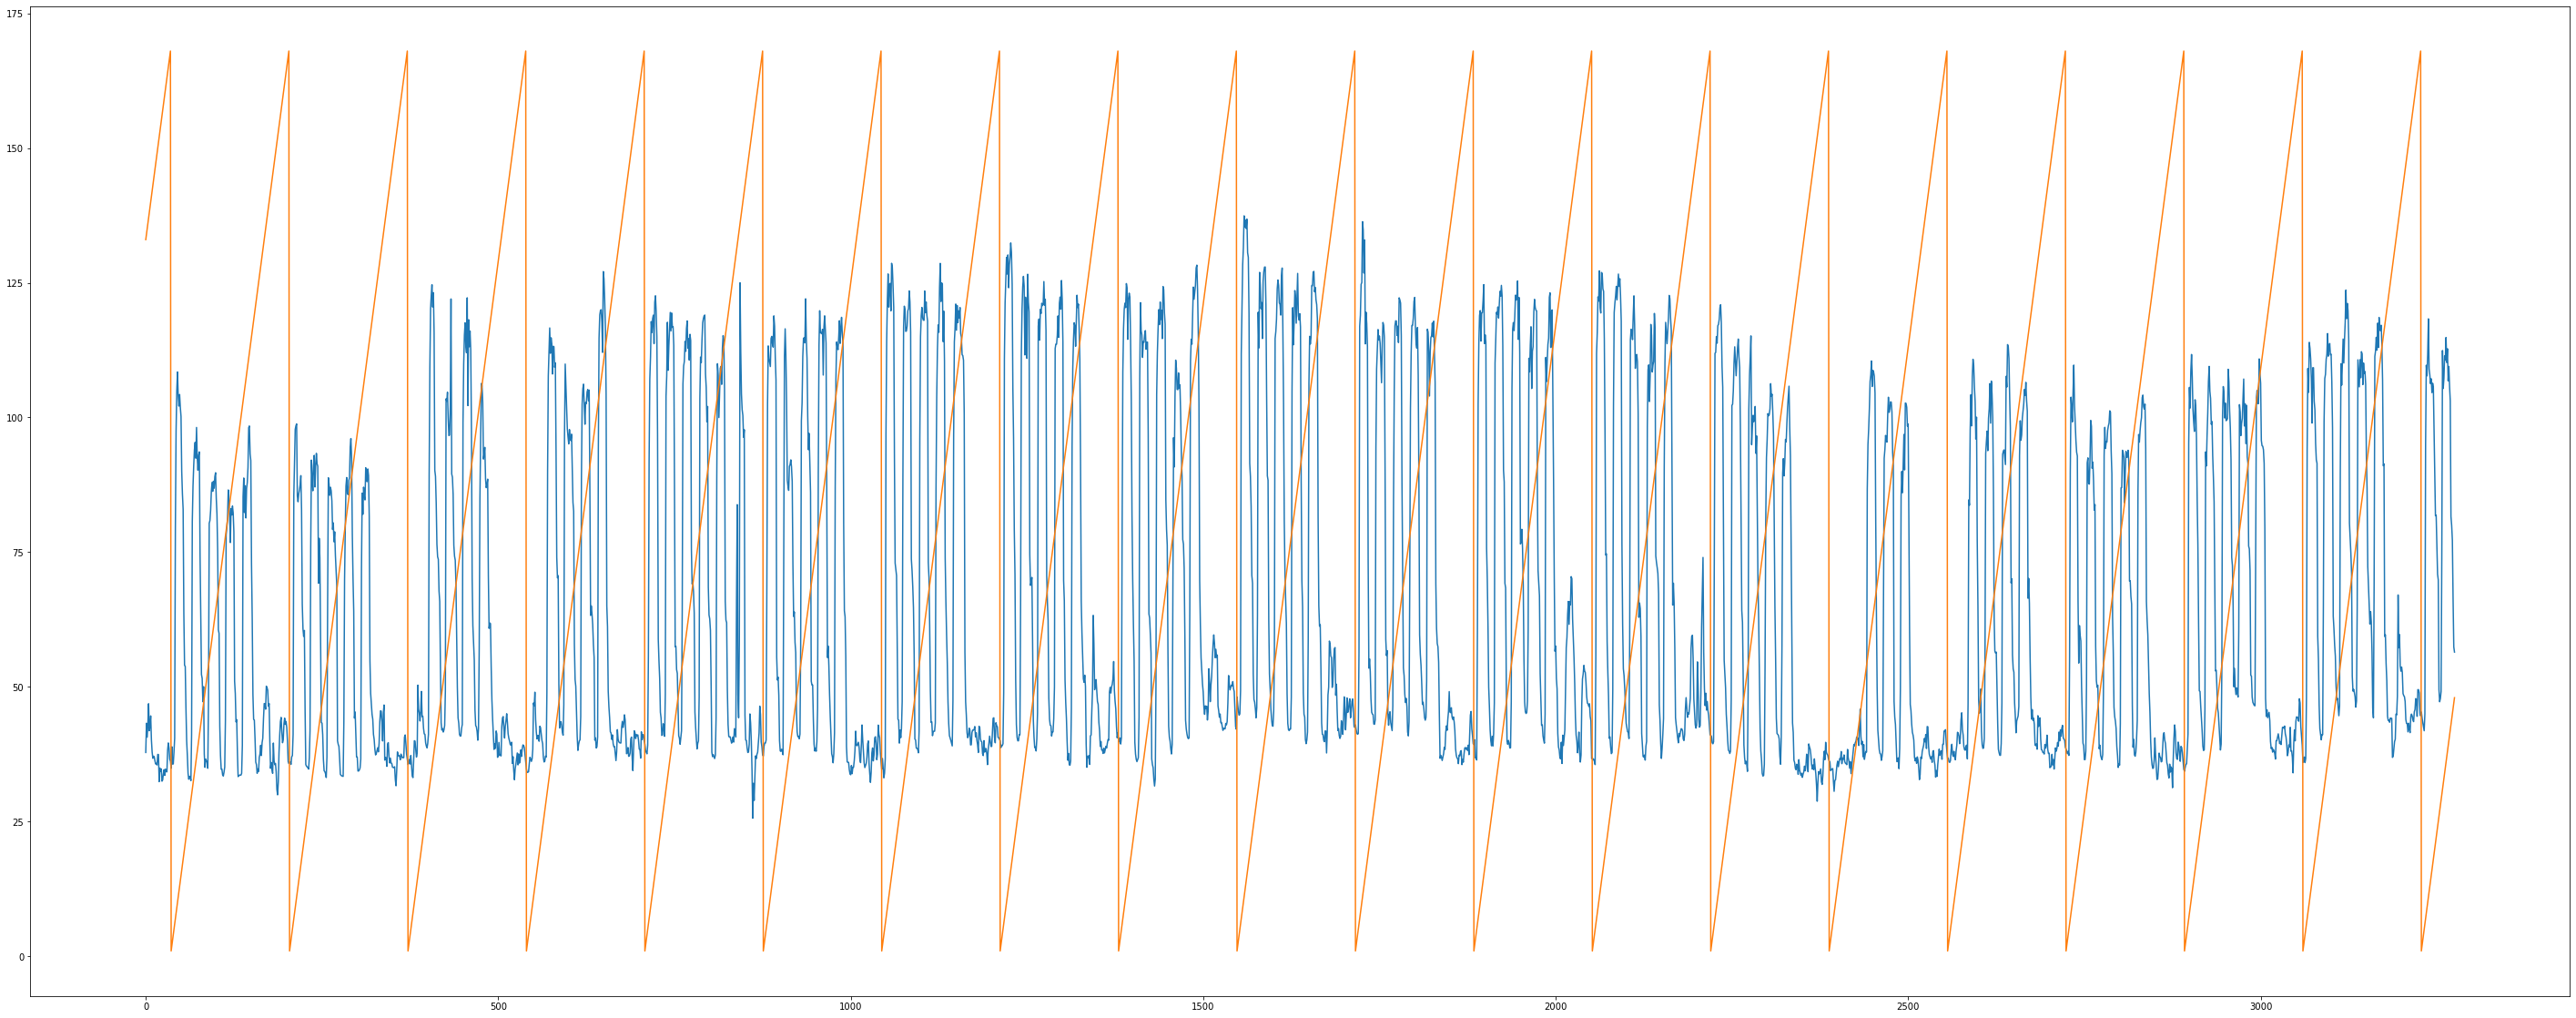

In [13]:
plt.rcParams["figure.figsize"] = (50, 20)

plt.plot(series)

In [14]:
! pip install dtaidistance

In [15]:
!pip install dtw-python

#### Hierarchical clustering 

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject
DTAIDistance C-extension for Numpy is not available. Proceeding anyway.
100%|█████████████████████████████████████████████████████████████████████████████▉| 3273/3276 [01:35<00:00, 34.24it/s]DTAIDistance C-extension for Numpy is not available. Proceeding anyway.

 16%|████████████▎                                                                  | 512/3276 [00:15<01:21, 33.78it/s]


 32%|████████████████████████▊                                                     | 1040/3276 [00:30<01:05, 34.15it/s]


 48%|█████████████████████████████████████▎                                        | 1568/3276 [00:46<00:49, 34.39it/s]


 64%|█████████████████████████████████████████████████▉                            | 2096/3276 [01:01<00:34, 33.93it/s]


 80%|██████████████████████████████████████████████████████████████▍               | 2624/3276 [01:16<00:18, 34.47it/s]


 96%|███████████████████████████████████████████████████████████████████████████   | 3152/3276 [01:32<00:03, 35.27it/s]


100%|█████████████████████████████████████████████████████████████████████████████▉| 3275/3276 [01:35<00:00, 34.15it/s]


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

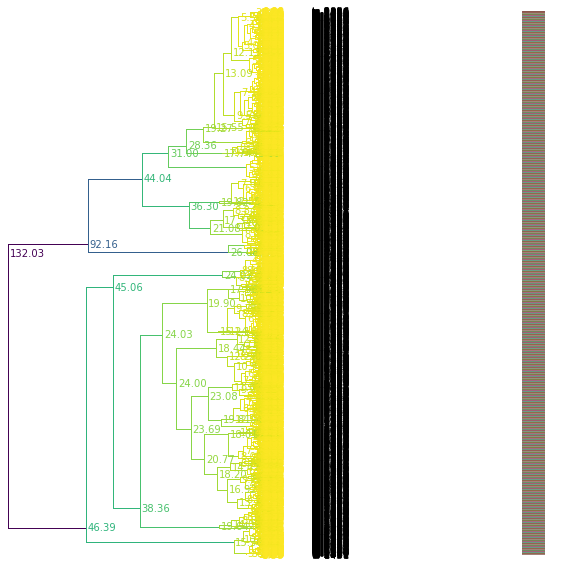

In [16]:
# from dtaidistance import clustering
# model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
# cluster_idx = model1.fit(series)
# model2 = clustering.HierarchicalTree(model1)
# cluster_idx = model2.fit(series)
# # Let’s plot this clustering.

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (50, 20)
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
# show_ts_label = lambda idx: "ts-" + str(idx)
# model2.plot(axes=ax, show_ts_label=show_ts_label,
#            show_tr_label=True, ts_label_margin=-10,
#            ts_left_margin=10, ts_sample_length=1)


from dtaidistance import dtw
from dtaidistance import clustering
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(series)
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(series)
# Let’s plot this clustering.

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 20)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model2.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

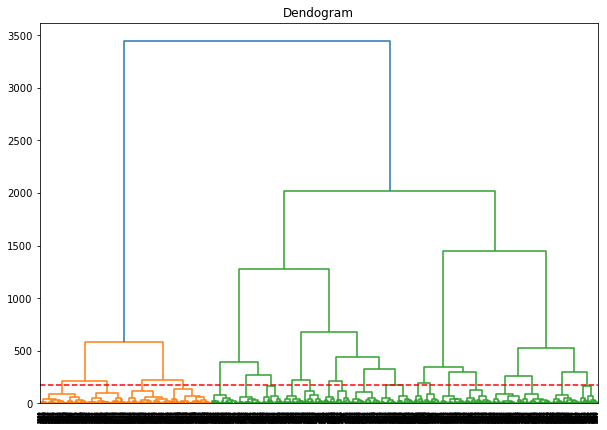

In [17]:
from scipy.cluster.hierarchy import linkage, dendrogram

# # Compute linkage matrix using complete linkage method
# Z = linkage(series, method='complete')

# # Plot dendrogram
# plt.figure(figsize=(20, 10))
# dendrogram(Z)
# plt.show()

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(series,method='ward'))
plt.axhline(y=175, color='r', linestyle='--')


In [18]:
unique_colors = set(dend['color_list'])
print(unique_colors)
len(unique_colors)-1

{'C2', 'C1', 'C0'}


2

#### Linkage clustering 

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

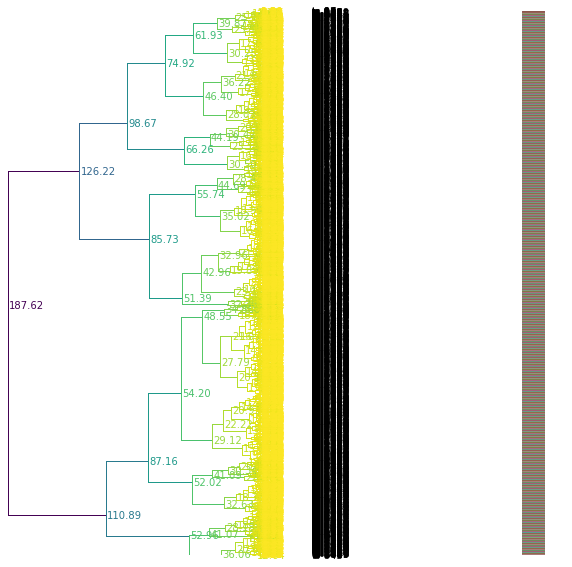

In [19]:
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)
# Let’s plot the clusters.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model3.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)

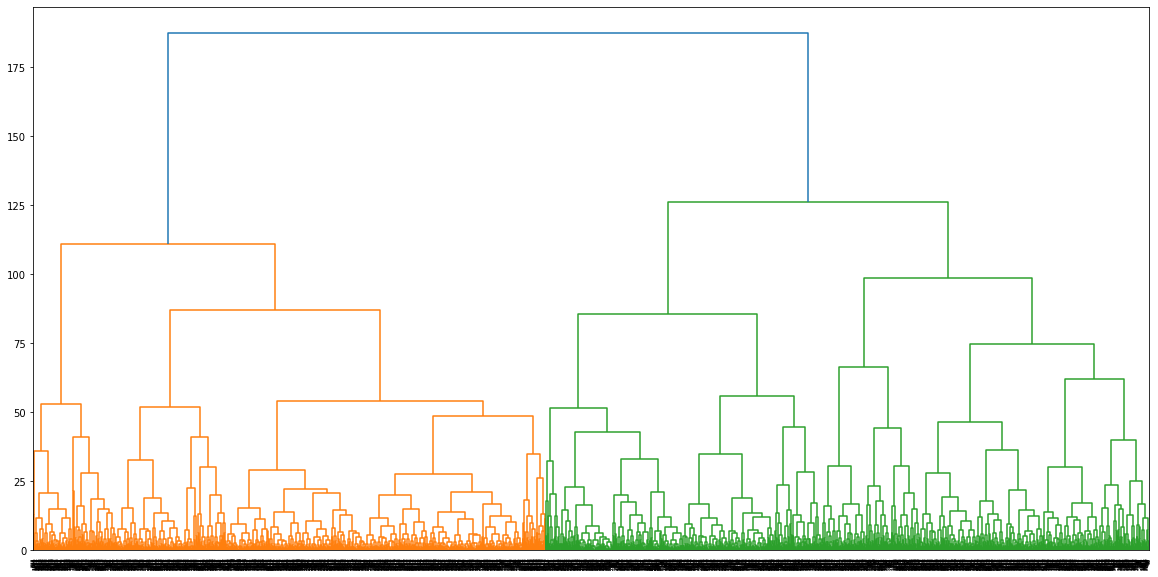

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


In [20]:
from dtaidistance import clustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute linkage matrix using complete linkage method
Z = linkage(series, method='complete')

# Plot dendrogram
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.show()

model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(series)

# Let's plot the clusters and dendrogram
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# show_ts_label = lambda idx: "ts-" + str(idx)
# model3.plot(axes=ax[0], show_ts_label=show_ts_label,
#             show_tr_label=True, ts_label_margin=-10,
#             ts_left_margin=10, ts_sample_length=1)
# ax[1].set_title("Dendrogram")
# dendrogram(Z, ax=ax[1])
# # # Get unique colors used in the dendrogram
# # unique_colors = []
# # for line in ax[1].get_lines():
# #     color = line.get_color()
# #     if color not in unique_colors:
# #         unique_colors.append(color)
# # ax[2].axis("off")
# # ax[2].text(0, 0.5, "Unique colors in the dendrogram:\n" + str(unique_colors))
# plt.show()


In [21]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Assuming you have your data in a numpy array called "data"
# Each row of the data array represents a data point
# The number of columns in the data array represents the number of features

# Create an instance of the AgglomerativeClustering class
clustering_model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward',)

# Fit the model to the data
predict = clustering_model.fit_predict(df)

predict

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [22]:
main['linkage'] = predict

In [23]:
main

,Time,week_date,Max_Load,Min_Load,Mean_Load,hour_of_the_week,WeekDay,linkage
0,2022-09-17 12:00:00,2022-09-11 (week 37),46.666,29.376,37.835000,133,Saturday,1
1,2022-09-17 13:00:00,2022-09-11 (week 37),51.045,31.066,43.259552,134,Saturday,1
2,2022-09-17 14:00:00,2022-09-11 (week 37),45.432,35.635,40.673883,135,Saturday,1
3,2022-09-17 15:00:00,2022-09-11 (week 37),47.489,36.948,43.198733,136,Saturday,1
4,2022-09-17 16:00:00,2022-09-11 (week 37),59.146,36.043,46.881117,137,Saturday,1
...,...,...,...,...,...,...,...,...
3271,2023-01-31 19:00:00,2023-01-29 (week 5),87.146,72.626,79.960733,44,Tuesday,0
3272,2023-01-31 20:00:00,2023-01-29 (week 5),82.882,70.813,77.210667,45,Tuesday,0
3273,2023-01-31 21:00:00,2023-01-29 (week 5),76.380,57.502,66.348317,46,Tuesday,0
3274,2023-01-31 22:00:00,2023-01-29 (week 5),62.340,52.269,57.426000,47,Tuesday,0


No handles with labels found to put in legend.


The average Silhouette Score is : 0.47852688561803874
The average davies_bouldin Score is : 0.6370009932616506
The average calinski_harabasz Score is : 3726.3386652129516


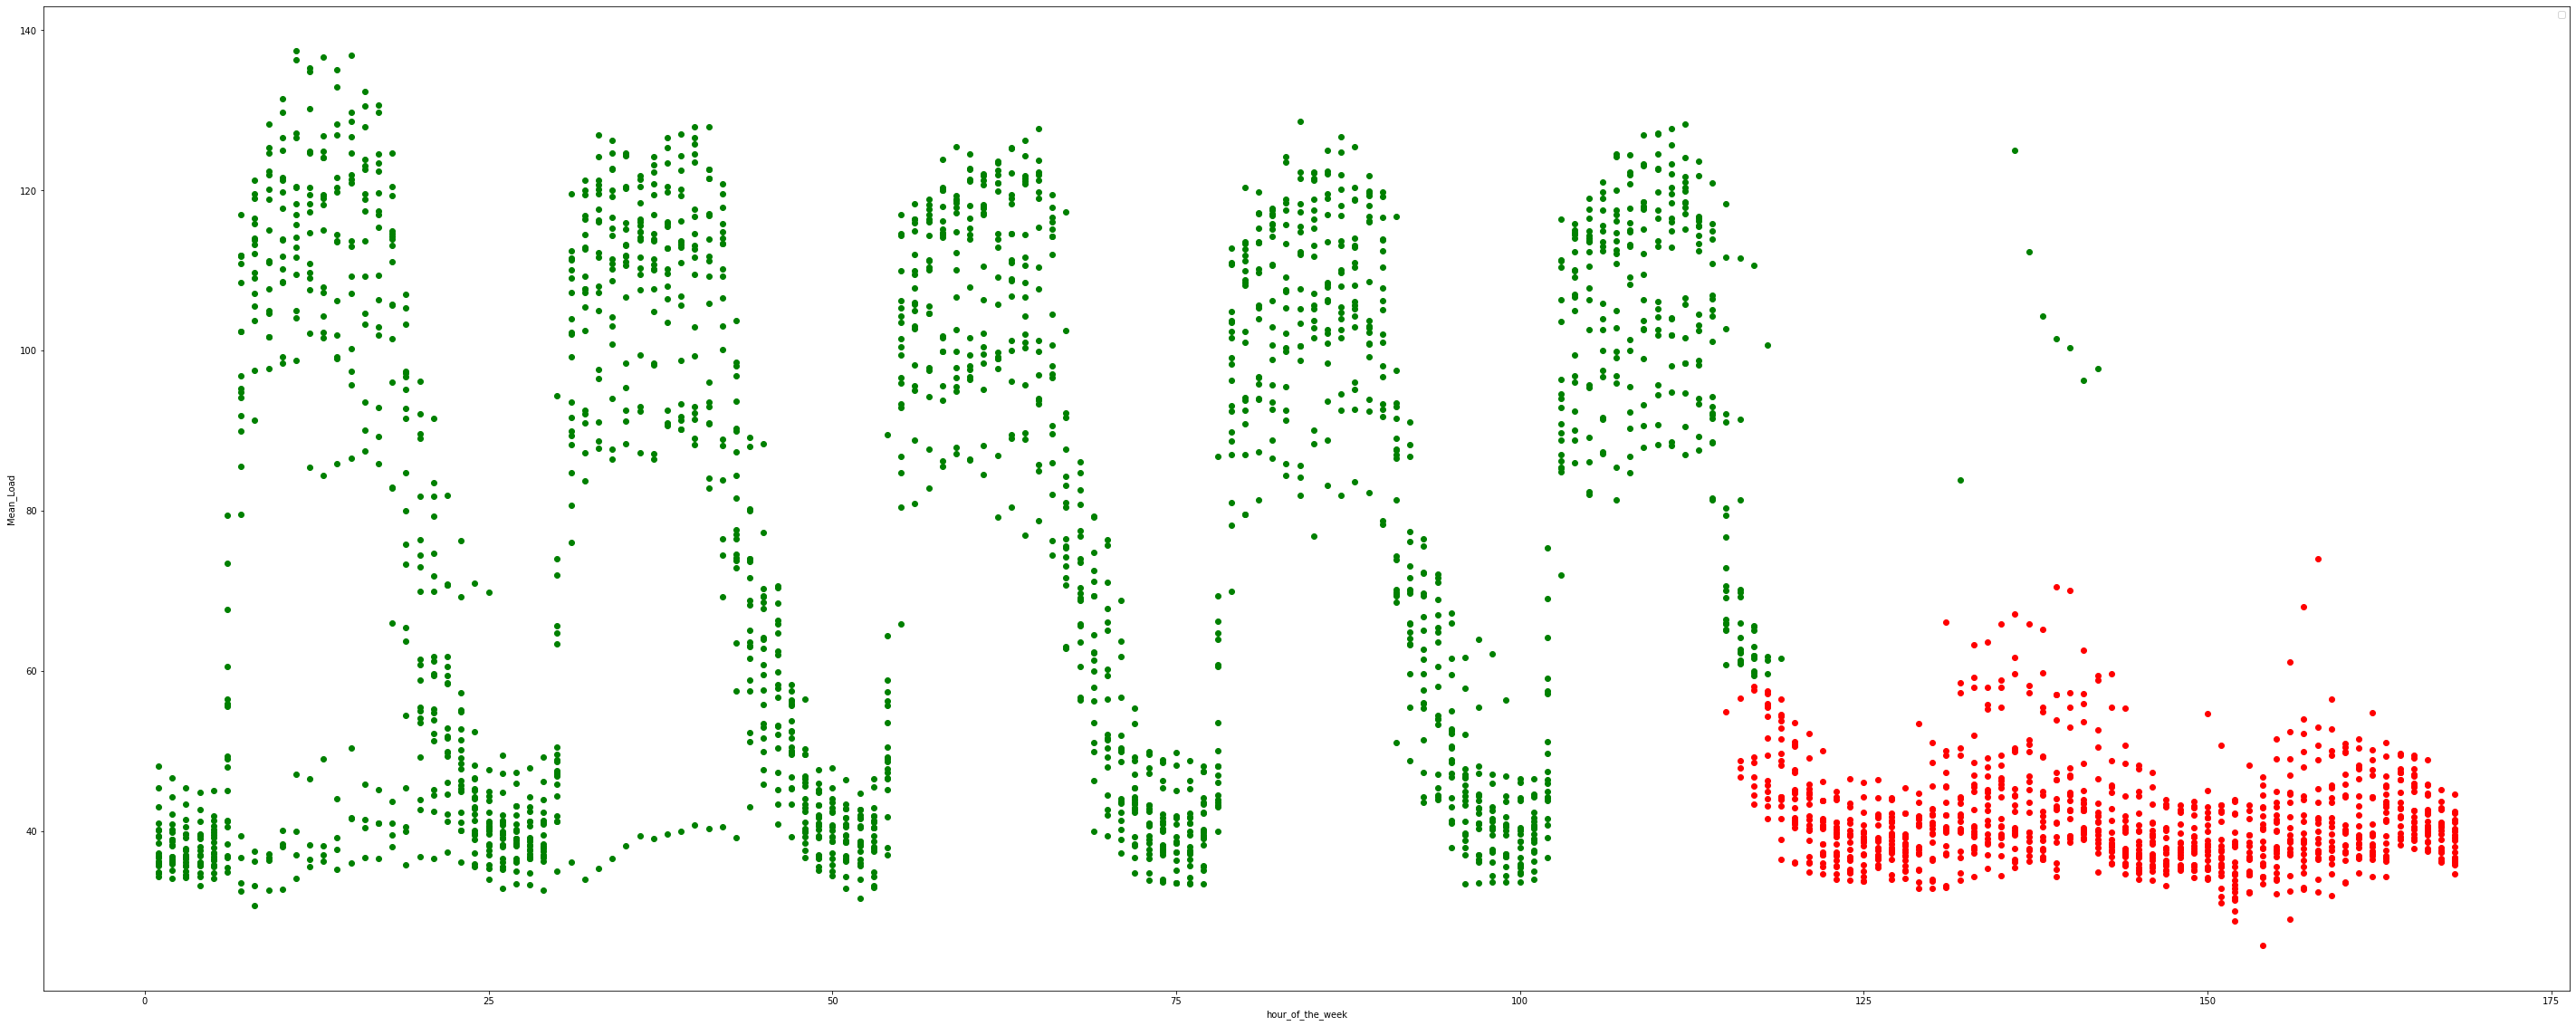

In [24]:
# df['linkage'] = y_predict
df1 = main[main.linkage==0]
df2 = main[main.linkage==1]
df3 = main[main.linkage==2]


plt.scatter(df1.hour_of_the_week, df1['Mean_Load'], color='green')
plt.scatter(df2.hour_of_the_week, df2['Mean_Load'], color='red')
plt.scatter(df3.hour_of_the_week, df3['Mean_Load'], color='black')


plt.xlabel('hour_of_the_week')
plt.ylabel('Mean_Load')
plt.legend()

silhouette_avg = silhouette_score(series,predict)
print("The average Silhouette Score is :", silhouette_avg)

davies_bouldin = davies_bouldin_score(series,predict)
print("The average davies_bouldin Score is :", davies_bouldin)

calinski_harabasz = calinski_harabasz_score(series,predict)
print("The average calinski_harabasz Score is :", calinski_harabasz)



#### K-means clustering 

{}
6.425486323228762


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.13s/it]


(None, array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

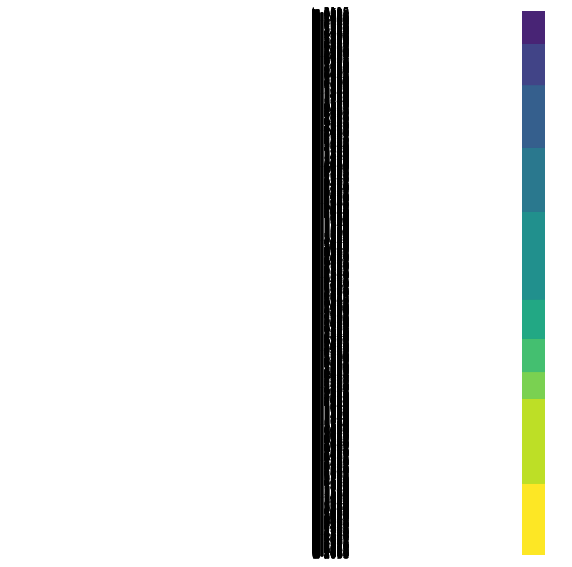

In [25]:
from dtaidistance.clustering import kmeans
model4 = kmeans.KMeans(k=10)
cluster_idx, performed_it = model4.fit(series)
# Here we have used 10 centers to make clusters using k-means clustering. Let’s plot the clusters.

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: "ts-" + str(idx)
model4.plot(axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=1)


#### K-Medoids clustering 

DTAIDistance C-extension for Numpy is not available. Proceeding anyway.


(<Figure size 3600x1440 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

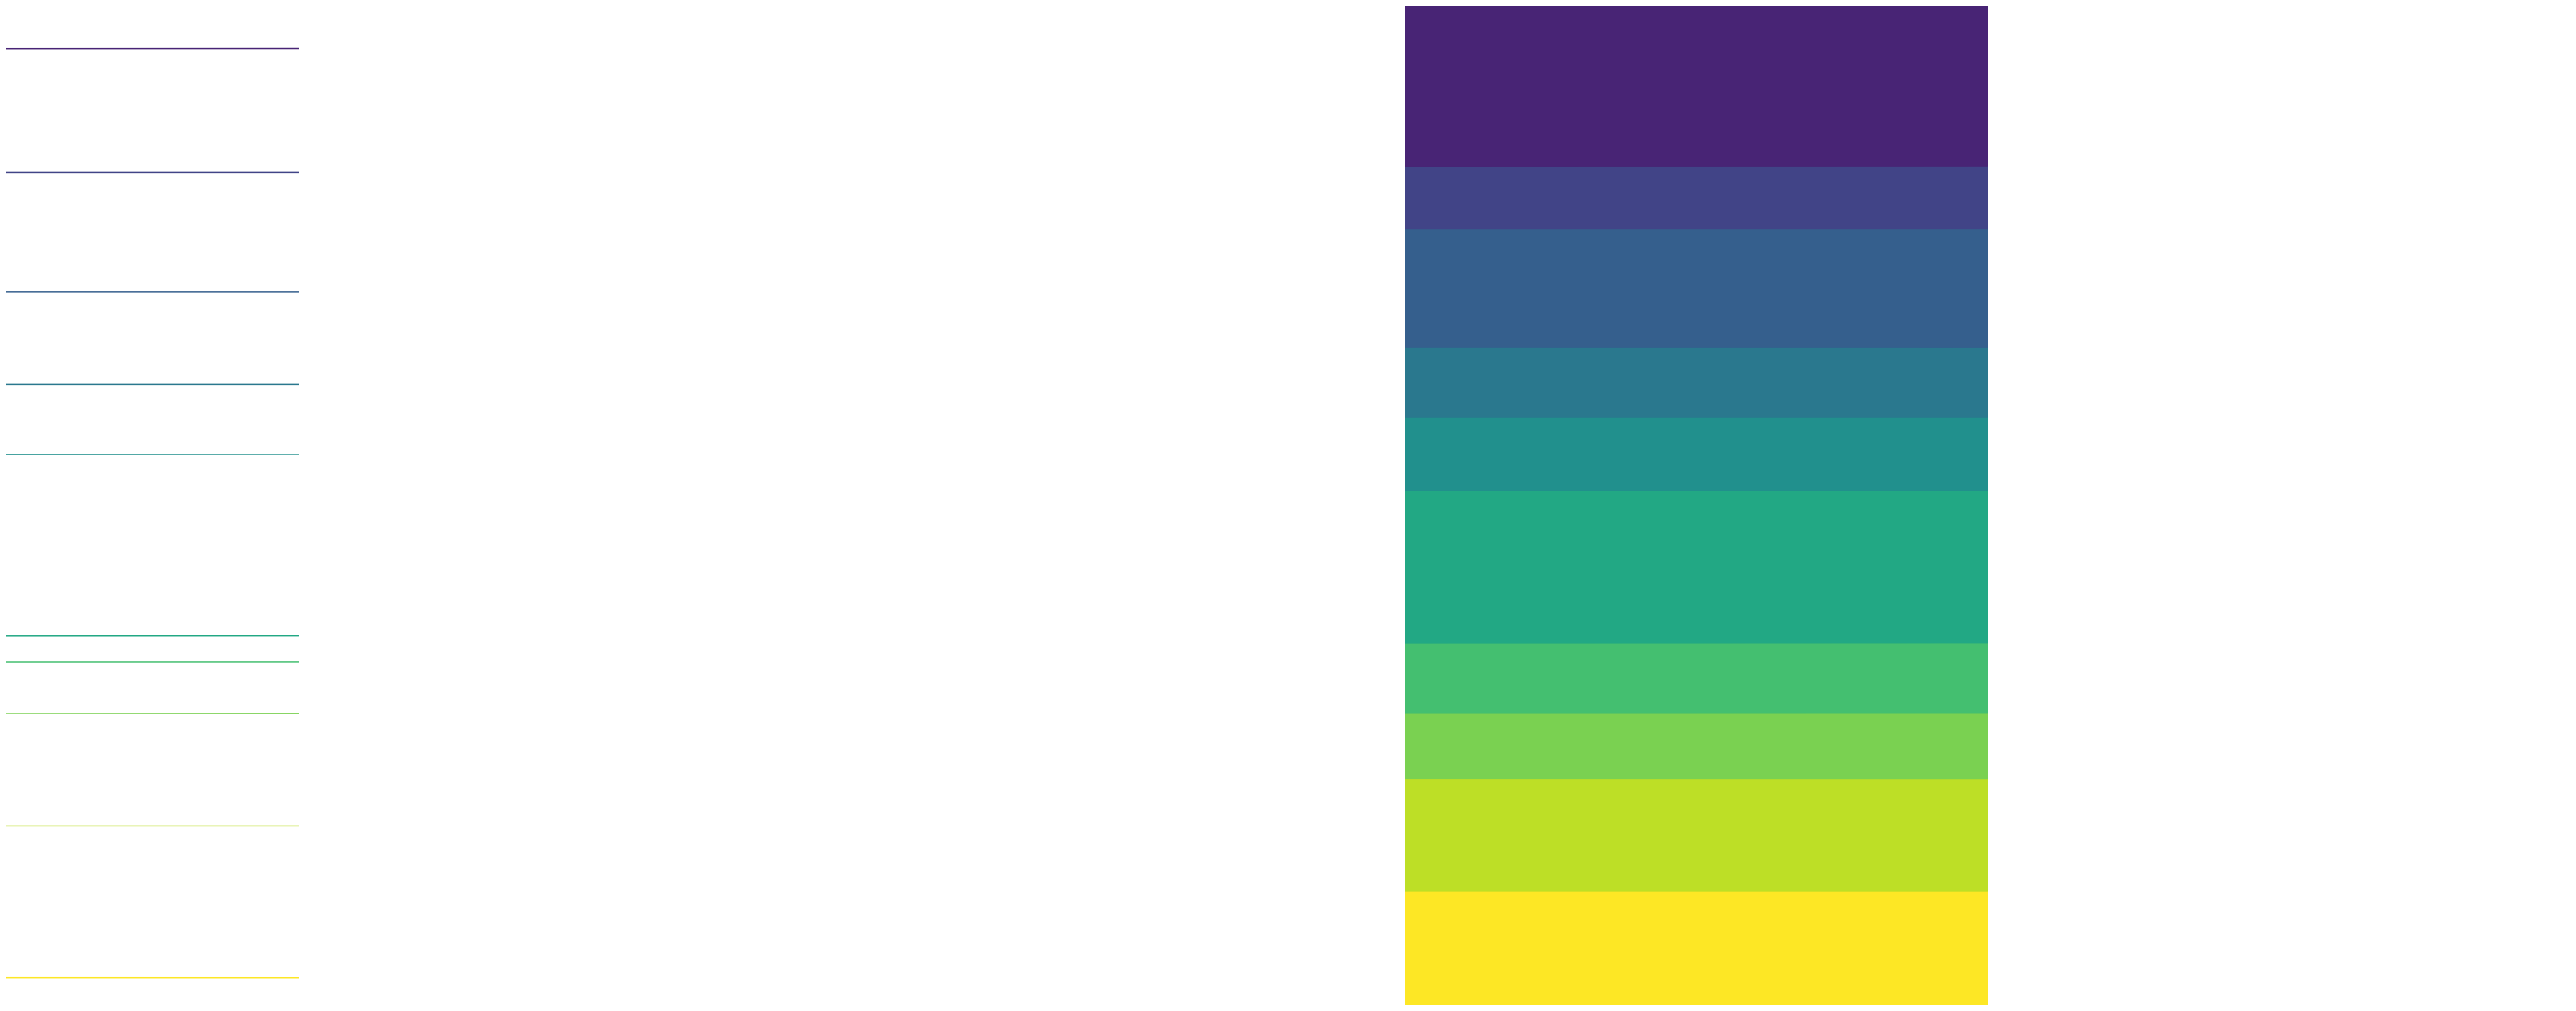

In [26]:
from dtaidistance import dtw, clustering
 
model5 = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=10)
cluster_idx = model5.fit(series)
# Let’s plot the clusters.

model5.plot()

In [1]:
# from dtaidistance import dtw, clustering
 
# model5 = clustering.KMedoids(dtw.distance_matrix_fast, {}, k=10)
# cluster_idx = model5.fit(series)

# # Get indices of medoids
# medoid_indices = model5.get_medoids()

# # Print medoid indices
# print("Medoid indices:", medoid_indices)


In [ ]:
# !pip install PyClustering 

In [ ]:
# import scipy.cluster.hierarchy as shc
# plt.figure(figsize=(10,7))
# plt.title("Dendogram")
# dend = shc.dendrogram(shc.linkage(series,method='ward'))
# plt.axhline(y=175, color='r', linestyle='--')